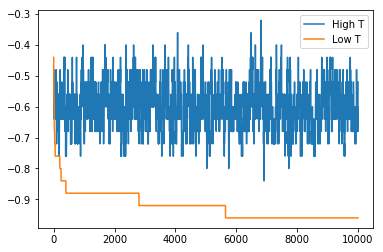

In [47]:
# The purpose of this assignment is to develop data handling skills around statistical information.
# The two files are PE/N data from 1D MC simulations with N=25, V=50, at T=1.0 or T=0.1.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
def autocorr1D(array):
    '''Takes in a linear numpy array, performs autocorrelation
       function and returns normalized array with half the length 
       of the input'''
    ft = numpy.fft.rfft(array-numpy.average(array)) 
    acorr = numpy.fft.irfft(ft*numpy.conjugate(ft))/(len(array)*numpy.var(array))
    return acorr[0:len(acorr)//2]

u1 = numpy.loadtxt('1.0.txt')
u2 = numpy.loadtxt('0.1.txt')
fig, ax = plt.subplots()
ax.plot(u1,label="High T")
ax.plot(u2,label="Low T")
legend = ax.legend(loc="upper right")

In [3]:
#1. What are the means and standard deviations of these two datasets?

# T = 1.0:

print('The mean PE of the T = 1.0 dataset = {}'.format(numpy.mean(u1)))
print('The standard deviation of the T = 1.0 dataset = {}'.format(numpy.std(u1)))
print()

# T = 0.1:
print('The mean PE of the T = 0.1 dataset = {}'.format(numpy.mean(u2)))
print('The standard deviation of the T = 0.1 dataset = {}'.format(numpy.std(u2)))

The mean PE of the T = 1.0 dataset = -0.602336
The standard deviation of the T = 1.0 dataset = 0.06835424715407229

The mean PE of the T = 0.1 dataset = -0.9222560000000003
The standard deviation of the T = 0.1 dataset = 0.04520918561531494


In [48]:
def find_nearest(array):  # Using this to find the first index of the autocorr data sets near zero
    
    index = 0
    for value in array:
        if value > 0:
            index = index + 1
        elif value <= 0:
          break

    return index

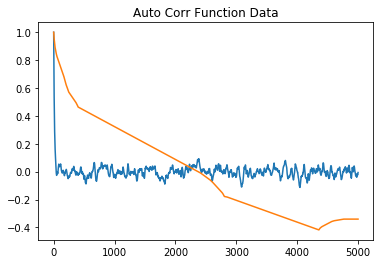

T = 1.0:
The auto correlation function drops to zero very quickly
we can expect to take a relatively large amount of statistically independent data points from the overall data set.

Finding the first values that appear to be around 0 in the autocorr function data:

First index below zero = 42
Value at index 41 = 0.0009209813456486114
Value at index 42 = -0.004489626536009907

T = 0.1:
For the low T data set, the auto correlation function doesnt reach zero until roughly around x=2,500.
If we took every 2500th measurement from this data set, then we would only get 4-5 data points in total.

Finding the first values that appear to be around 0 in the autocorr function data:

First index below zero = 2376
Value at index 2375 = 9.318790175520271e-05
Value at index 2376 = -0.00014166064097507412


In [55]:
#2. How many statistically independent samples can we extract from each of these data sets?

U1 = autocorr1D(u1)
fig, bx = plt.subplots()
bx.plot(range(len(U1)),U1,label='High T')

U2 = autocorr1D(u2)
bx.plot(range(len(U2)),U2,label='Low T')
plt.title('Auto Corr Function Data')
plt.show()

print('T = 1.0:')
print('The auto correlation function drops to zero very quickly')
print('we can expect to take a relatively large amount of statistically independent data points from the overall data set.')

highT_range = find_nearest(U1)
print()
print('Finding the first values that appear to be around 0 in the autocorr function data:')
print()
print('First index below zero = {}'.format(highT_range))
print('Value at index {} = {}'.format(highT_range - 1,U1[highT_range - 1]))
print('Value at index {} = {}'.format(highT_range,U1[highT_range]))

print()
print('T = 0.1:')
print('For the low T data set, the auto correlation function doesnt reach zero until roughly around x=2,500.')
print('If we took every 2500th measurement from this data set, then we would only get 4-5 data points in total.')

lowT_range = find_nearest(U2)
print()
print('Finding the first values that appear to be around 0 in the autocorr function data:')
print()
print('First index below zero = {}'.format(lowT_range))
print('Value at index {} = {}'.format(lowT_range - 1,U2[lowT_range - 1]))
print('Value at index {} = {}'.format(lowT_range,U2[lowT_range]))

In [52]:
#4. What are the means and standard deviations of the statistically independent subsets of these data sets?

# High Temperature:
# Find every nth value where n = 41
new_highT = [u1[0:-1:41]]
new_highT_avg = numpy.mean(new_highT)
new_highT_std = numpy.std(new_highT)
print('New high temperature subset average = {}'.format(new_highT_avg))
print('New high temperature subset std. deviation = {}'.format(new_highT_std))
print()

# Low Temperature:
# Find every nth value where n = 2375
new_lowT = new_highT = [u2[0:-1:2375]]
new_lowT_avg = numpy.mean(new_lowT)
new_lowT_std = numpy.std(new_lowT)

print('New high temperature subset average = {}'.format(new_lowT_avg))
print('New high temperature subset std. deviation = {}'.format(new_lowT_std))

New high temperature subset average = -0.5985245901639346
New high temperature subset std. deviation = 0.06826505876202595

New high temperature subset average = -0.8320000000000001
New high temperature subset std. deviation = 0.1982321870938219


In [ ]:
#5. You choose to either (a) Tell me the average potential energy of this system at T=1.0, or
#   (b) Tell me the average potential energy of this system at T=0.1. 
#   Either way, I'll go find the "real" potential energy, which was calculated by running for 
#   infinite time in both cases and compare it against what you tell me. The twist is, that you 
#   have to bet your life on not being off by more than 1%. Do you choose, (a) or (b), and why?

The subset average of the high temperature is much closer to the average of the entire high temperature data set than it is for the low temperature case.

Also, the standard deviaton of the high temperature subset is much lower than it is for the high temperature subset.

All together, this shows that we can be much more confident about sampling from the higher temperature data than the lower temperature data.
The auto correlation function gave us our first clue that this would be true, and gave us the interval(s) we can expect to use and still get statistically independent data.

So, the answer the question, I would be much more confident telling you the average of the system at T = 1.0